<a href="https://colab.research.google.com/github/MRobalinho/PyTorch-DEEP-LEARNING/blob/master/PyTorch_DEEP_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch - DEEP LEARNING WITH PYTORCH 

## Using MNIST Datasets

PyTorch is an open-source machine learning library for Python, based on Torch, used for applications such as natural language processing. It is primarily developed by Facebook's artificial-intelligence research group, and Uber's "Pyro" software for probabilistic programming is built on it.

**The MNIST dataset**

The MNIST dataset was constructed from two datasets of the US National Institute of Standards and Technology (NIST). The training set consists of handwritten digits from 250 different people, 50 percent high school students, and 50 percent employees from the Census Bureau. Note that the test set contains handwritten digits from different people following the same split.

The MNIST dataset is publicly available at http://yann.lecun.com/exdb/mnist/ and consists of the following four parts: - Training set images: train-images-idx3-ubyte.gz (9.9 MB, 47 MB unzipped, and 60,000 samples) - Training set labels: train-labels-idx1-ubyte.gz (29 KB, 60 KB unzipped, and 60,000 labels) - Test set images: t10k-images-idx3-ubyte.gz (1.6 MB, 7.8 MB, unzipped and 10,000 samples) - Test set labels: t10k-labels-idx1-ubyte.gz (5 KB, 10 KB unzipped, and 10,000 labels)

**PyTorch provides two high-level features:**

a) Tensor computation (like NumPy) with strong GPU acceleration

b) Deep Neural Networks built on a tape-based autodiff system

**To keep things short:**

PyTorch consists of 4 main packages:

1. torch: a general purpose array library similar to Numpy that can do computations on GPU when the tensor type is cast to (torch.cuda.TensorFloat)

2. torch.autograd: a package for building a computational graph and automatically obtaining gradients

3. torch.nn: a neural net library with common layers and cost functions

4. torch.optim: an optimization package with common optimization algorithms like SGD,Adam, etc

**PyTorch Tensors**

In terms of programming, Tensors can simply be considered multidimensional arrays. Tensors in PyTorch are similar to NumPy arrays, with the addition being that Tensors can also be used on a GPU that supports CUDA. PyTorch supports various types of Tensors.

**References:**

[PyTorch](https://pytorch.org/)

[Example with MNIST Datasets](https://gist.github.com/reddragon/3fa9c3ee4d10a7be242183d2e98cfc5d)

[Git Hsaghir](https://hsaghir.github.io/data_science/pytorch_starter/)


In [2]:
!pip install torch

    100% |████████████████████████████████| 591.8MB 27kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x61852000 @  0x7f458929d2a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641


In [3]:
!pip install torchvision

    100% |████████████████████████████████| 61kB 3.9MB/s 
    100% |████████████████████████████████| 2.0MB 14.2MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [0]:
# Packages
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
import torchvision.datasets as datasets
from torch.autograd import Variable

In [48]:
# Print Pytorch Version
print(torch.__version__)

1.0.0


In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 1, 5)
        self.conv2 = nn.Conv2d(1, 1, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(1 * 10 * 10, 100)
        self.fc2 = nn.Linear(100, 10)

    def forward(self, x):
        x = F.relu((self.conv1(x)))
        x = F.relu(F.max_pool2d((self.conv2(x)), 2))
        # x = self.pool(x)
        # x = F.relu(self.conv3(x))
        x = x.view(-1, 1 * 10 * 10)
        # x = F.relu(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return F.log_softmax(x)

def unnormalize(img):
    img = img / 2 + 0.5
    return img

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [50]:
# Basically re-maps the [0,1] pixel to the [-1,1] range so that mean is 0.
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Getting the data
print ('Getting Data from datasets.MNIST ----------------')

mnist_trainset = datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
mnist_trainloader = torch.utils.data.DataLoader(mnist_trainset, batch_size=50,
                                          shuffle=True, num_workers=2)
mnist_testset = datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
mnist_testloader = torch.utils.data.DataLoader(mnist_testset, batch_size=50,
                                         shuffle=False, num_workers=2)

Getting Data from datasets.MNIST ----------------


In [51]:
# First, let's check the number of items in each Python variable.
# For the MNIST train set, we use the Python len function to get the number of items.
print ('Records to Train: ', len(mnist_trainset), '  ; Records to Test: ', len(mnist_testset))

Records to Train:  60000   ; Records to Test:  10000


In [52]:
# let's explore what those items actually are.
# look at the first item in the MNIST train set variable.
mnist_trainset[0]

(tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.000

In [56]:
# We see two things - a PIL image item, then a comma, and a number.
type(mnist_trainset[0])

tuple

In [74]:
# use the Python variable assignment convention to get the image and integer into two separate Python variables.

index_image = 5        # Test to print image , select your index

train_image_x, train_target_x = mnist_trainset[index_image]

# let's look at the image using PIL show operation.
print('The image in the dataset MNIST at Index: ', index_image, '  , is number: ', train_target_x)

The image in the dataset MNIST at Index:  5   , is number:  tensor(2)


--------------------------------------------------------------------------
--- Print image for index:  0   , is number:  tensor(5)
--------------------------------------------------------------------------
--------------------------------------------------------------------------
--- Print image for index:  1   , is number:  tensor(0)
--------------------------------------------------------------------------
--------------------------------------------------------------------------
--- Print image for index:  2   , is number:  tensor(4)
--------------------------------------------------------------------------
--------------------------------------------------------------------------
--- Print image for index:  3   , is number:  tensor(1)
--------------------------------------------------------------------------
--------------------------------------------------------------------------
--- Print image for index:  4   , is number:  tensor(9)
---------------------------------------------

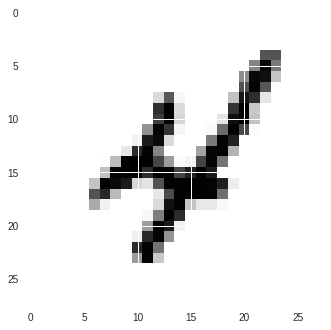

In [164]:
# https://matplotlib.org/users/image_tutorial.html#plotting-numpy-arrays-as-images
# Print images fro MNIST datasets

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

i = 0
while i < 10:
  index_image = i
  i = i + 1
  train_image_x, train_target_x = mnist_trainset[index_image]
  print('--------------------------------------------------------------------------')
  print('--- Print image for index: ', index_image, '  , is number: ', train_target_x)
  print('--------------------------------------------------------------------------')
  plt.imshow(train_image_x[0])


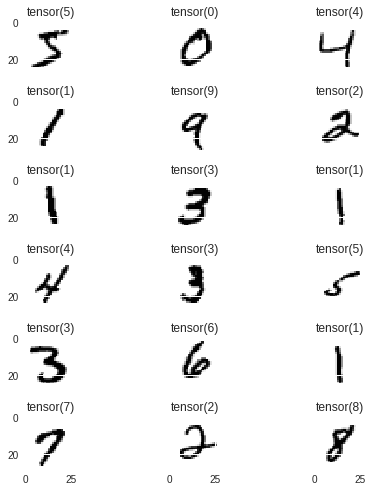

In [173]:
# Plot / Subplots Images
fig, axes = plt.subplots(6,3, 
                         figsize=(7,7),
                         sharex=True, sharey=True,
                         subplot_kw=dict(adjustable='box-forced', aspect='equal')) #https://stackoverflow.com/q/44703433/1870832

# --- Plot Images  - 18 images
i = 0
while i < 18:
  index_image = i

  train_image_x, train_target_x = mnist_trainset[index_image]
  images_to_plot = train_image_x[0]
  
  # axes (subplot) objects are stored in 2d array, accessed with axes[row,col]
  subplot_row = i//3    # floor division discards the fractional part
  subplot_col = i%3     # the % operator returns the remainder of the division
  
  # print('i=', i ,'   Row=',subplot_row, '   col=',subplot_col)
  ax = axes[subplot_row, subplot_col]

  # plot image on subplot

  ax.imshow(images_to_plot, cmap='gray_r')
   
  ax.set_title(train_target_x )
  ax.set_xbound([0,28])
    
  i = i + 1

plt.tight_layout()
plt.show()


In [175]:
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.5)

# zero the parameter gradients
optimizer.zero_grad()

number_epoches = 10  # - Put number epoches

print('Training with datasets.MNIST ------ Number Epoches :', number_epoches)

for epoch in range(number_epoches):  # loop over the dataset multiple times 

    running_loss = 0.0
    for i, data in enumerate(mnist_trainloader, 0):
        # get the inputs
        inputs, labels = data
        # print inputs.numpy().shape

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 2000 mini-batches
            print('Epoch:','[%d, %5d] loss in the batch: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0


Training with datasets.MNIST ------ Number Epoches : 10


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: [1,   100] loss in the batch: 2.303
Epoch: [1,   200] loss in the batch: 2.303
Epoch: [1,   300] loss in the batch: 2.301
Epoch: [1,   400] loss in the batch: 2.300
Epoch: [1,   500] loss in the batch: 2.299
Epoch: [1,   600] loss in the batch: 2.295
Epoch: [1,   700] loss in the batch: 2.293
Epoch: [1,   800] loss in the batch: 2.289
Epoch: [1,   900] loss in the batch: 2.284
Epoch: [1,  1000] loss in the batch: 2.275
Epoch: [1,  1100] loss in the batch: 2.266
Epoch: [1,  1200] loss in the batch: 2.251
Epoch: [2,   100] loss in the batch: 2.222
Epoch: [2,   200] loss in the batch: 2.178
Epoch: [2,   300] loss in the batch: 2.090
Epoch: [2,   400] loss in the batch: 1.949
Epoch: [2,   500] loss in the batch: 1.734
Epoch: [2,   600] loss in the batch: 1.481
Epoch: [2,   700] loss in the batch: 1.293
Epoch: [2,   800] loss in the batch: 1.144
Epoch: [2,   900] loss in the batch: 1.004
Epoch: [2,  1000] loss in the batch: 0.950
Epoch: [2,  1100] loss in the batch: 0.893
Epoch: [2, 

In [20]:
loss.data

tensor(2.3048)

In [176]:
print('Finished Training  with: ', number_epoches, ' epoches ---------')

correct = 0
total = 0
for data in mnist_testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('--------------------------------------------------')
print('Accuracy of the network on the %d test images: %f %%' % (
    total, 100.0 * correct / total))

Finished Training  with:  10  epoches ---------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


--------------------------------------------------
Accuracy of the network on the 10000 test images: 94.000000 %
